## Practice Lab 10 - Support Vector Machines
Based on Chapter 5 from Aurelien Geron's book, Hands-on Machine Learning with Scikit-Learn Keras & Tensorflow.\
Original code examples from book in github [here](https://github.com/ageron/handson-ml2)

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/dtrad/geoml_course/blob/master/Practice10_SVM.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [52]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

### Exercise 1: Linear Classification for the iris dataset.
Load the Iris data set and fit a SVM classification model for petals widths.
The code below selects 2/3 of the iris dataset, only those instances that are either Setosa or Versicolor.

In [53]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

print(X.shape)
print(y.shape)
print('petal length range',X[:,0].min(),X[:,0].max())
print('petal width range',X[:,1].min(),X[:,1].max())
print(y)

(100, 2)
(100,)
petal length range 1.0 5.1
petal width range 0.1 1.8
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


#### Plotting boundaries 
Use sklearn to write a SVC (support vector classifier) and plot the results as a function of petal width and length.\
The decision function is ${\bf w^T x} + b = 0$ or in this case, $w[0] \times x0 + w[1] \times x1 + b = 0$. 

a) Plot the data X, with X[:,0] on the horizontal axis and X[:,1] on the vertical axis\
b) Plot the boundary calculating x[1] as a function of x[0] for a regularly sampled axis x[0].\
c) Plot the margins ($margin=\frac{1}{w[1]}$)\
d) Allow for outliers to be inside the separation area

In [62]:
# SVM Classifier model
from sklearn.svm import SVC
svm_clf = SVC(kernel="linear", C=float("inf"))
#svm_clf = SVC(kernel="linear", C=0.1)
svm_clf.fit(X, y)
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]
print('coefficient w',w,'bias',b)
# Generate the independent axis (x0) and calculate (x1) using the slope w and bias b.
x0 = np.linspace(X[:,0].min(), X[:,0].max(), 200)
print(x0.shape)                
x1 = -w[0]/w[1] * x0 - b/w[1]
print(x1.shape)
margin=1/w[1]

coefficient w [1.29411744 0.82352928] bias -3.7882347112962464
(200,)
(200,)


In [63]:
# to select samples to plot based on the target you can use:
print(X[:10,1][y[:10]==0])

[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1]


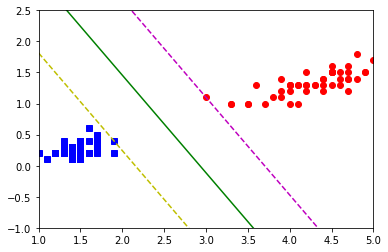

In [64]:
plt.plot(X[:,0][y==0],X[:,1][y==0],'bs')
plt.plot(X[:,0][y==1],X[:,1][y==1],'ro')
plt.plot(x0,x1,'g-')
plt.plot(x0,x1+margin,'m--')
plt.plot(x0,x1-margin,'y--')
plt.axis([1,5,-1,2.5]);

### Exercise 2: SVC for the moons data set.
Use the code below to generate the moons data set. \
Then fit the data using a linear SVC (LinearSVC) but adding high powers of features to perform non-linear separation (use PolynomialFeatures).\
Plot the boundaries between classes using a regular grid of test values. 

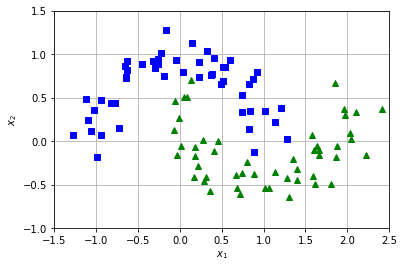

In [68]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
polynomial_svm_clf = Pipeline([("poly_features", PolynomialFeatures(degree=3)),
                              ("scaler",StandardScaler()),
                              ("svm_clf",LinearSVC(C=10, loss="hinge", random_state=42, max_iter=10000))])
polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf',
                 LinearSVC(C=10, loss='hinge', max_iter=10000,
                           random_state=42))])

(100, 100)
(10000,)
grid shape (10000, 2)
Prediction shape (10000,)
prediction shape after reshaping (100, 100)
decision function (100, 100)


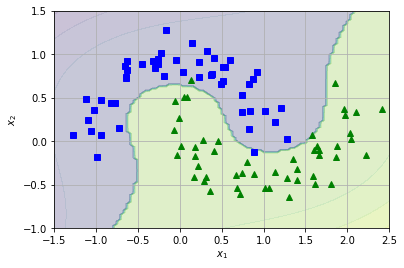

In [73]:
# Use the function below to plot boundaries. 
def plot_predictions(clf,axes):
    x0s=np.linspace(axes[0],axes[1],100)
    x1s=np.linspace(axes[2],axes[3],100)
    x0,x1 = np.meshgrid(x0s,x1s)
    X = np.c_[x0.ravel(),x1.ravel()]
    print(x0.shape)
    print(x0.ravel().shape)
    print('grid shape',X.shape)
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    print('Prediction shape',clf.predict(X).shape)
    print('prediction shape after reshaping',y_pred.shape)
    print('decision function',y_decision.shape)
    plt.contourf(x0,x1,y_pred, alpha=0.2)
    plt.contourf(x0,x1,y_decision, alpha=0.1)
#plt.show()
axes=[-1.5, 2.5, -1, 1.5]
plot_predictions(polynomial_svm_clf, axes)
plot_dataset(X, y, axes )

### Exercise 3: Non linear SVC
Now do the same as the previous exercise but this time use non-linear SVC by using the option kernel="poly".\
How does it compare with the previous result?


In [78]:
# Now we don't need PolynomialFeatures because the non-linear SVC has an option for 
# using a polynomial Kernel (using the "kernel trick").
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

(100, 100)
(10000,)
grid shape (10000, 2)
Prediction shape (10000,)
prediction shape after reshaping (100, 100)
decision function (100, 100)


Text(0.5, 1.0, '$d=3, r=1, C=5$')

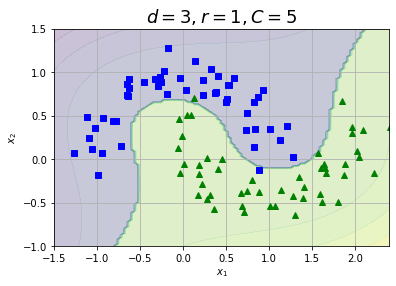

In [79]:
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

### Exercise 4: Non-Linear SVC with Radial Gaussian Functions
One more time let us classify the moons data set by using Radial Gaussian Functions (kernel="rbf")

In [84]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=1, C=1))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('svm_clf', SVC(C=1, gamma=1))])

(100, 100)
(10000,)
grid shape (10000, 2)
Prediction shape (10000,)
prediction shape after reshaping (100, 100)
decision function (100, 100)


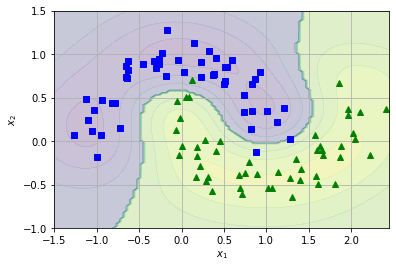

In [85]:
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])

### Exercise 5: SVM Regression  (SVR)
Fit the given 3rd order polynomial below with a non-linear SVR of grade 3.

In [112]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 - 1 * X**3 + np.random.randn(m, 1)/10).ravel()

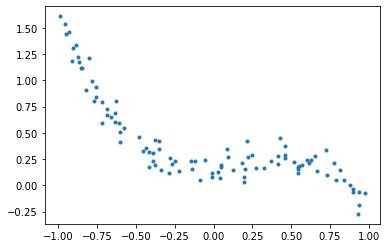

In [113]:
plt.plot(X,y,'.')

In [114]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=3, C=3, epsilon=.2, tol=0.01,gamma="scale")
svm_poly_reg.fit(X, y)

SVR(C=3, epsilon=0.2, kernel='poly', tol=0.01)

In [115]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$y$", fontsize=18)
    plt.legend()
    plt.axis(axes)

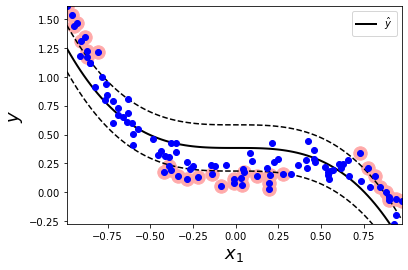

In [116]:
plot_svm_regression(svm_poly_reg, X, y, [X.min(),X.max(),y.min(),y.max()])

In [ ]:
#svm_poly_reg?